In [2]:
import numpy as np
import pandas as pd
from keras.utils import to_categorical
from keras import models
from keras import layers

In [9]:
#Load Deep Learning Libraries
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
import tensorflow as tf
from sklearn.metrics import accuracy_score, confusion_matrix


In [66]:
df = pd.read_csv('Positive and Negative Word List.csv', header=0)
#df = df.iloc[2:]
df1 = df.tail(-2)
df1

,Unnamed: 0,Negative Sense Word List,Positive Sense Word List
2,2,abolish,abundance
3,3,abominable,accelerate
4,4,abominably,accept
5,5,abominate,acclaim
6,6,abomination,accolade
...,...,...,...
4716,4716,zenana,NaN
4717,4717,zephyr,NaN
4718,4718,zero,NaN
4719,4719,zol,NaN


In [110]:
pos = df1.drop(df.columns[0],axis=1)
pos = pos.drop(df.columns[1],axis=1)
pos = pos.dropna()
pos['class']=1
pos.rename(columns={"Positive Sense Word List": "word"}, inplace=True)
pos

,word,class
2,abundance,1
3,accelerate,1
4,accept,1
5,acclaim,1
6,accolade,1
...,...,...
4692,zoom,1
4693,zorbing,1
4694,zouk,1
4695,zounds,1


In [111]:
neg = df1.drop(df.columns[0],axis=1)
neg = neg.drop(df.columns[2],axis=1)
neg = neg.dropna()
neg['class']=0
neg.rename(columns={"Negative Sense Word List": "word"}, inplace=True)
neg

,word,class
2,abolish,0
3,abominable,0
4,abominably,0
5,abominate,0
6,abomination,0
...,...,...
4716,zenana,0
4717,zephyr,0
4718,zero,0
4719,zol,0


In [112]:
data = pos.append(neg).reset_index(drop=True)
data

C:\Users\Trevor\AppData\Local\Temp\ipykernel_6452\548468622.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = pos.append(neg).reset_index(drop=True)


,word,class
0,abundance,1
1,accelerate,1
2,accept,1
3,acclaim,1
4,accolade,1
...,...,...
9409,zenana,0
9410,zephyr,0
9411,zero,0
9412,zol,0


In [159]:
data.to_csv('words.csv')

In [152]:
from sklearn.model_selection import train_test_split

#X = data.drop('class', axis=1)
X = data['word']
y = data['class']

#random_state is the seed used in randomising grouping
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, random_state=16
)

In [153]:
X_train

5579         defiant
2870     resiliently
7250       irritably
7203       invective
883         esteemed
            ...     
635     dumbfounding
1345        gratuity
581        disburden
2169          nibble
6825     ill-favored
Name: word, Length: 7531, dtype: object

In [154]:
from keras.preprocessing.text import Tokenizer
# create the tokenizer to tokenize each word
tokenizer = Tokenizer()

# fit the tokenizer on the documents
tokenizer.fit_on_texts(X_train)
# encode training data set
X_train = tokenizer.texts_to_matrix(X_train, mode='count')

# encode training data set
X_test = tokenizer.texts_to_matrix(X_test, mode='count')

n_words1 = X_test.shape[1]

In [155]:
n_words1

7391

In [156]:
model = tf.keras.models.Sequential([
       
    tf.keras.layers.Dense(256, input_shape=(n_words1,), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),

    
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
          
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=0.03),
              metrics=['acc'])

callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)]

history = model.fit(X_train, y_train,
                    epochs=15,
                    validation_data=(X_test, y_test,),
                    verbose=1,
                    callbacks=callbacks,
                   )

C:\Users\Trevor\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/15
236/236 [==============================] - 3s 7ms/step - loss: 0.7628 - acc: 0.5148 - val_loss: 0.6982 - val_acc: 0.5088
Epoch 2/15
236/236 [==============================] - 1s 5ms/step - loss: 0.5771 - acc: 0.6946 - val_loss: 0.7201 - val_acc: 0.5491
Epoch 3/15
236/236 [==============================] - 1s 5ms/step - loss: 0.2618 - acc: 0.9012 - val_loss: 1.1130 - val_acc: 0.5066
Epoch 4/15
236/236 [==============================] - 1s 5ms/step - loss: 0.1848 - acc: 0.9355 - val_loss: 0.7389 - val_acc: 0.5486
Epoch 5/15
236/236 [==============================] - 1s 5ms/step - loss: 0.1485 - acc: 0.9531 - val_loss: 0.7725 - val_acc: 0.5475
Epoch 6/15
236/236 [==============================] - 1s 5ms/step - loss: 0.1218 - acc: 0.9595 - val_loss: 0.9552 - val_acc: 0.5486


In [157]:
import matplotlib.pyplot as plt

def plot_history(history):
    accuracy = history.history['acc']
    val_accuracy = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    epochs = range(1,len(accuracy) + 1)
    
    # Plot accuracy  
    plt.figure(1)
    plt.plot(epochs, accuracy, 'b', label='Training accuracy')
    plt.plot(epochs, val_accuracy, 'g', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    
    # Plot loss
    plt.figure(2)
    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'g', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()


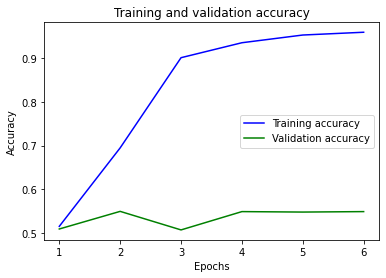

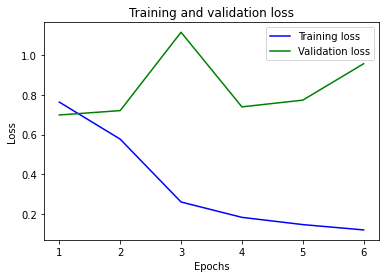

In [158]:
plot_history(history)

In [10]:
df = pd.read_csv('comments.csv')
df

,Unnamed: 0,id,text,subreddit,author,upvotes,downvotes,score,created_utc,url,link,parent_id
0,0,jdm98sm,"Mmmm yes, forward thinking, like underground t...",elonmusk,ultimate_placeholder,1,0,1,1.679750e+09,https://www.reddit.com/r/elonmusk/comments/120...,https://www.quicktechnics.com/en/post/musk-den...,t1_jdl2saz
1,1,jdm72zy,Probably not. It's like if attaching horse to ...,elonmusk,kroOoze,1,0,1,1.679749e+09,https://www.reddit.com/r/elonmusk/comments/121...,https://www.httnews.com/technology/eyi02xa6agb...,t3_1215ef2
2,2,jdm2d94,Cool in any decade ever! A rocket going to spa...,elonmusk,swag_money69,1,0,1,1.679746e+09,https://www.reddit.com/r/elonmusk/comments/121...,https://v.redd.it/e72u906e8spa1,t3_12150g4
3,3,jdlxewi,"He is on of the most famous people out there, ...",elonmusk,jordanhanson,1,0,1,1.679743e+09,https://www.reddit.com/r/elonmusk/comments/zg1...,https://www.teslaoracle.com/2022/12/07/elon-mu...,t1_izhfq3i
4,4,jdltrsd,The **average** rent for an apartment in Los A...,elonmusk,OGquaker,1,0,1,1.679740e+09,https://www.reddit.com/r/elonmusk/comments/11r...,https://cleanenergyrevolution.co/2023/03/15/te...,t1_jcbl54o
...,...,...,...,...,...,...,...,...,...,...,...,...
657,657,jcqspkf,It will be the Elon bot. Tesla is already run...,elonmusk,Whole-Mail2239,1,0,1,1.679174e+09,https://www.reddit.com/r/elonmusk/comments/11u...,https://elonmu.sh/,t1_jcp97pf
658,658,jcqsehv,"I mean he's right, Elon doesn't seem like the ...",elonmusk,pyguy6,3,0,3,1.679173e+09,https://www.reddit.com/r/elonmusk/comments/11t...,https://www.httnews.com/business/elon-musk-spa...,t1_jcky3md
659,659,jcqsa8k,And his trans kid disowning him probably did a...,elonmusk,pyguy6,8,0,8,1.679173e+09,https://www.reddit.com/r/elonmusk/comments/11t...,https://www.httnews.com/business/elon-musk-spa...,t1_jcjk107
660,660,jcqs7mk,Therapy and counseling is a big part of gender...,elonmusk,pyguy6,2,0,2,1.679173e+09,https://www.reddit.com/r/elonmusk/comments/11t...,https://www.httnews.com/business/elon-musk-spa...,t1_jcj777s
